In [3]:
import pandas as pd
import numpy as np

data = pd.read_excel('training.xlsx')
class_1_data = data[data['output'] == 0].iloc[:, :-1]
class_2_data = data[data['output'] == 1].iloc[:, :-1]
centroid_class_1 = class_1_data.mean(axis=0)
centroid_class_2 = class_2_data.mean(axis=0)
spread_class_1 = class_1_data.std(axis=0)
spread_class_2 = class_2_data.std(axis=0)
interclass_distance = np.linalg.norm(centroid_class_1 - centroid_class_2)

print("Class 1 Centroid:")
print(centroid_class_1.mean())
print("\nClass 1 Spread:")
print(spread_class_1)   
print("\nClass 2 Centroid:")
print(centroid_class_2.mean())
print("\nClass 2 Spread:")
print(spread_class_2)
print("\nInterclass Distance:", interclass_distance)


Class 1 Centroid:
-0.003104238028519999

Class 1 Spread:
embed_0      0.294157
embed_1      0.089135
embed_2      0.119411
embed_3      0.116298
embed_4      0.148771
               ...   
embed_379    0.179513
embed_380    0.249280
embed_381    0.095489
embed_382    0.233278
embed_383    0.161591
Length: 384, dtype: float64

Class 2 Centroid:
-0.0025223632477315177

Class 2 Spread:
embed_0      0.205344
embed_1      0.169176
embed_2      0.190184
embed_3      0.165142
embed_4      0.180539
               ...   
embed_379    0.209587
embed_380    0.240728
embed_381    0.137176
embed_382    0.172404
embed_383    0.216872
Length: 384, dtype: float64

Interclass Distance: 1.3445466151063252


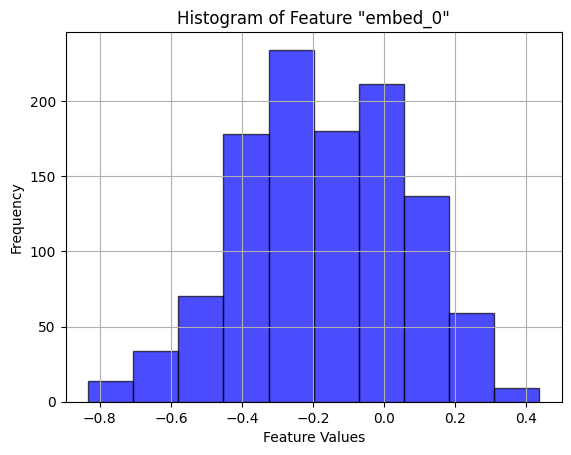

Mean: -0.17029445322602035
Variance: 0.05343827792925807


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_excel('training.xlsx')
feature_data = data['embed_0']
hist, bins = np.histogram(feature_data, bins=10)  # You can adjust the number of bins as needed

plt.hist(feature_data, bins=10, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Feature "embed_0"')
plt.xlabel('Feature Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
mean = np.mean(feature_data)
variance = np.var(feature_data)

print("Mean:", mean)
print("Variance:", variance)


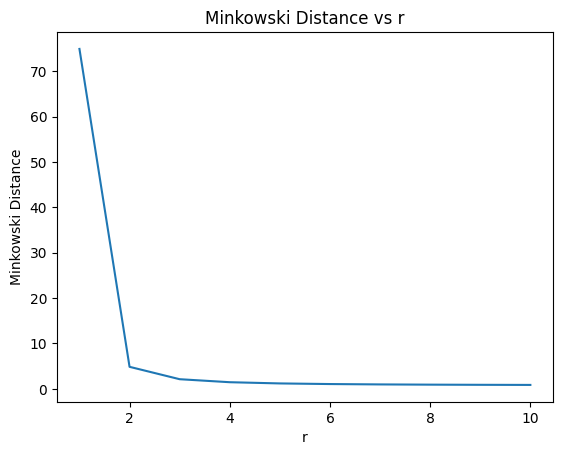

In [5]:
from scipy.spatial.distance import minkowski

feature_vector1 = data.iloc[0, :]  # Example feature vector 1
feature_vector2 = data.iloc[1, :]  # Example feature vector 2

r_values = range(1, 11)
distances = []

for r in r_values:
    distance = minkowski(feature_vector1, feature_vector2, r)
    distances.append(distance)

plt.plot(r_values, distances)
plt.xlabel('r')
plt.ylabel('Minkowski Distance')
plt.title('Minkowski Distance vs r')
plt.show()


In [6]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['output'])  
y = data['output']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [7]:
import pandas as pd

data = pd.read_excel('training.xlsx')
def convert_to_binary_class(value):
    if value < 1:
        return 0
    elif value > 4:
        return 0
    else:
        return 1
data['output'] = data['output'].apply(convert_to_binary_class)
data.to_excel('modified_dataset.xlsx', index=False)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
data = pd.read_excel('modified_dataset.xlsx')
X = data.drop('output', axis=1)
y = data['output']
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.7699115044247787


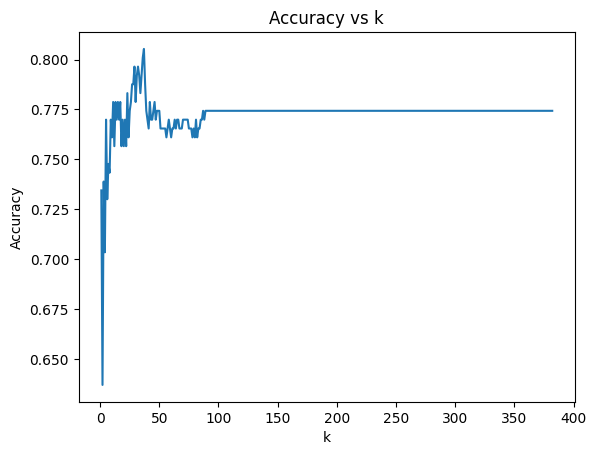

In [8]:
accuracy_values = []
k_values = range(1, 383)  
for k in k_values:
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    accuracy = neigh.score(X_test, y_test)
    accuracy_values.append(accuracy)

plt.plot(k_values, accuracy_values)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k')
plt.show()

In [9]:
from sklearn import *
predictions = neigh.predict(X_test)
print("Predictions:", predictions)


Predictions: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[ 25,  26],
       [ 26, 149]], dtype=int64)

In [11]:
precision = 149 / (149 + 26)
recall = 149 / (149 + 26)
f1 = 2 * (precision * recall) / (precision + recall)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Precision: 0.8514285714285714
Recall: 0.8514285714285714
F1-score: 0.8514285714285714


Confusion Matrix (Test Data):
 [[ 25  26]
 [ 26 149]]
Precision (Test Data): 0.8514285714285714
Recall (Test Data): 0.8514285714285714
F1-Score (Test Data): 0.8514285714285714


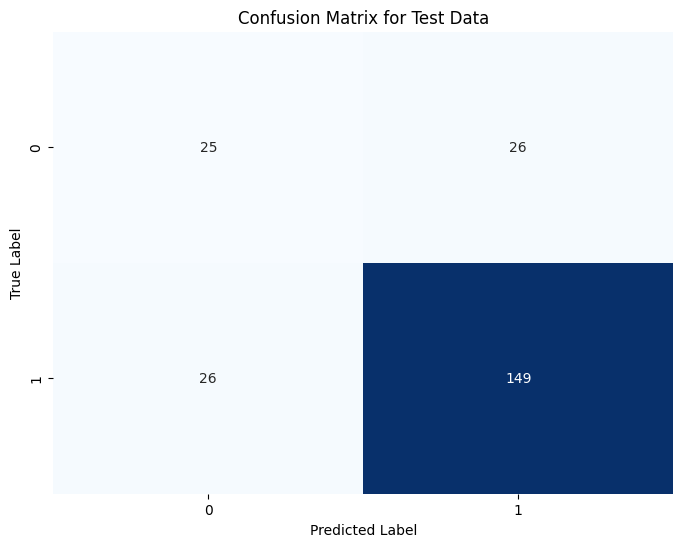

In [12]:
# Confusion Matrix for Test Data
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix_test = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Test Data):\n", conf_matrix_test)

# Precision, Recall, and F1-Score for Test Data
precision_test = precision_score(y_test, y_pred)
recall_test = recall_score(y_test, y_pred)
f1_test = f1_score(y_test, y_pred)

print("Precision (Test Data):", precision_test)
print("Recall (Test Data):", recall_test)
print("F1-Score (Test Data):", f1_test)

# Display Confusion Matrix with Heatmap for Test Data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Test Data')
plt.show()


Confusion Matrix (Training Data):
 [[137 118]
 [ 49 596]]
Precision (Training Data): 0.834733893557423
Recall (Training Data): 0.924031007751938
F1-Score (Training Data): 0.8771155261221486


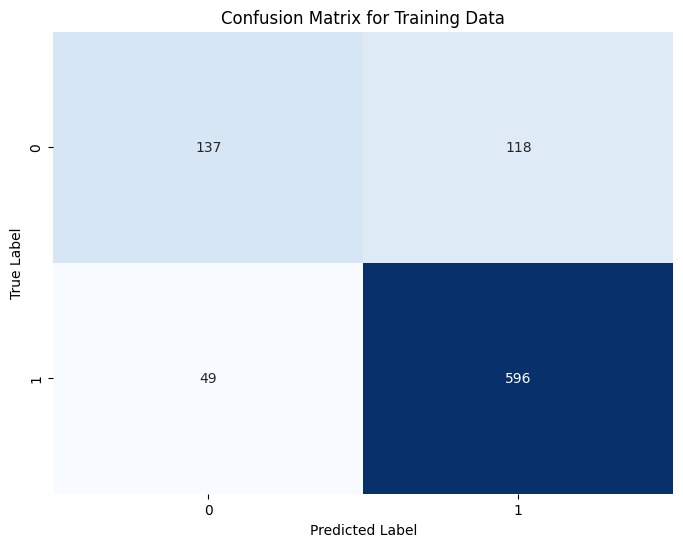

In [13]:
# Predictions on Training Data
y_train_pred = knn.predict(X_train)

# Confusion Matrix for Training Data
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix (Training Data):\n", conf_matrix_train)

# Precision, Recall, and F1-Score for Training Data
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

print("Precision (Training Data):", precision_train)
print("Recall (Training Data):", recall_train)
print("F1-Score (Training Data):", f1_train)

# Display Confusion Matrix with Heatmap for Training Data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Training Data')
plt.show()


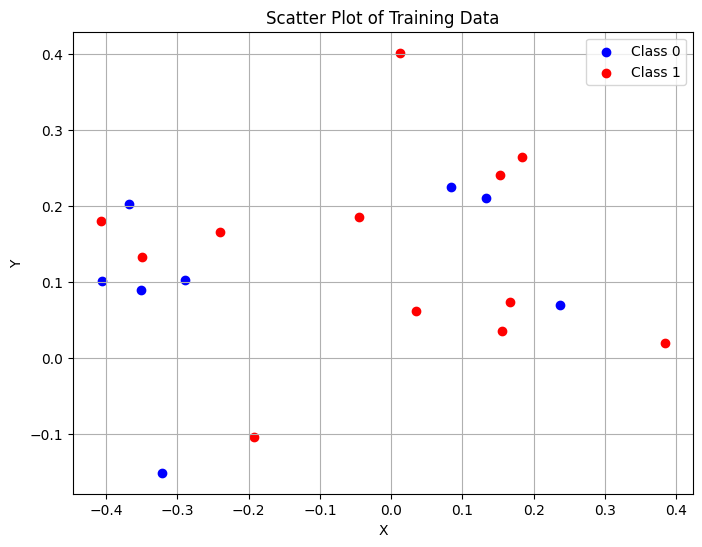

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel("training.xlsx")  # Replace "your_dataset.csv" with the actual file path

# Extracting features X and Y from the dataset
X = data['embed_0'].values
Y = data['embed_1'].values

# Randomly select 20 points
np.random.seed(42)  # for reproducibility
selected_indices = np.random.choice(len(X), size=20, replace=False)

# Assign points to two different classes (class0 - Blue & class1 - Red)
classes = np.random.randint(0, 2, size=20)  # randomly assign class labels (0 or 1)

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X[selected_indices][classes == 0], Y[selected_indices][classes == 0], color='blue', label='Class 0')
plt.scatter(X[selected_indices][classes == 1], Y[selected_indices][classes == 1], color='red', label='Class 1')

plt.title('Scatter Plot of Training Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

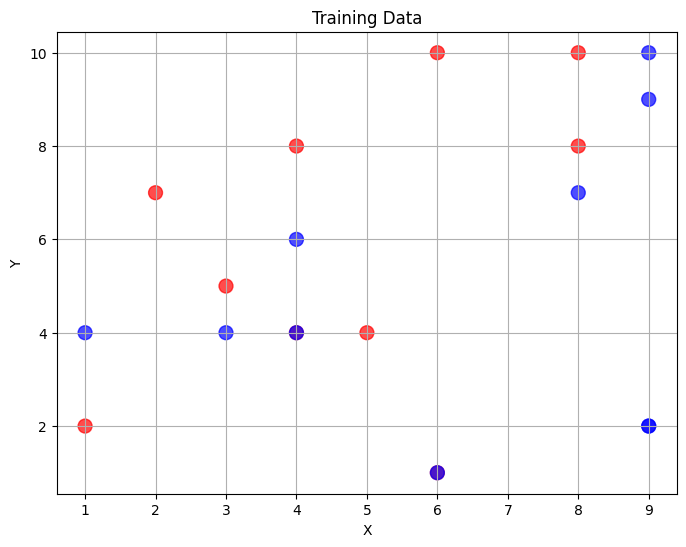

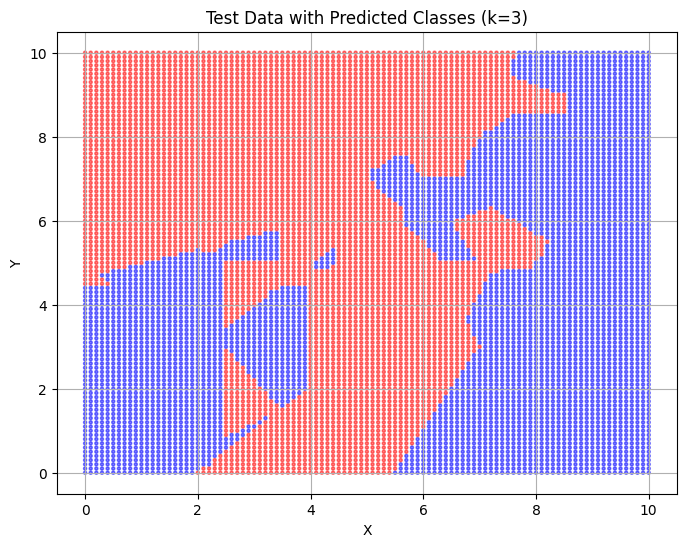

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(0)
X_train = np.random.randint(1, 11, size=(20, 2))
y_train = np.random.randint(0, 2, size=20)
colors = np.array(['blue', 'red'])
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=colors[y_train], s=100, alpha=0.7)
plt.title('Training Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()
x_values = np.arange(0, 10.1, 0.1)
y_values = np.arange(0, 10.1, 0.1)
X_test = np.array(np.meshgrid(x_values, y_values)).T.reshape(-1, 2)
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=colors[y_pred], s=5, alpha=0.5)
plt.title('Test Data with Predicted Classes (k=3)')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

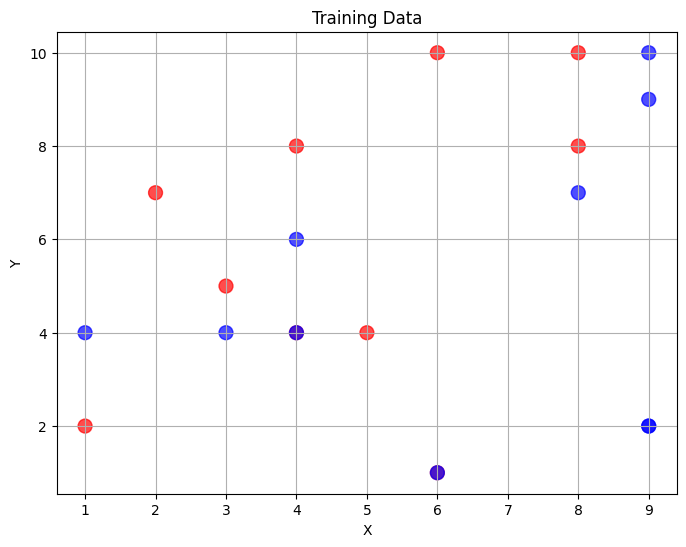

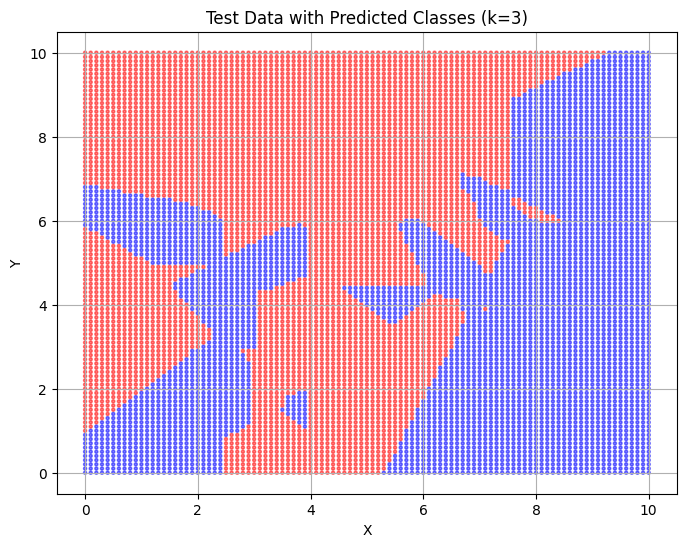

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(0)
X_train = np.random.randint(1, 11, size=(20, 2))
y_train = np.random.randint(0, 2, size=20)
colors = np.array(['blue', 'red'])
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=colors[y_train], s=100, alpha=0.7)
plt.title('Training Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()
x_values = np.arange(0, 10.1, 0.1)
y_values = np.arange(0, 10.1, 0.1)
X_test = np.array(np.meshgrid(x_values, y_values)).T.reshape(-1, 2)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=colors[y_pred], s=5, alpha=0.5)
plt.title('Test Data with Predicted Classes (k=3)')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

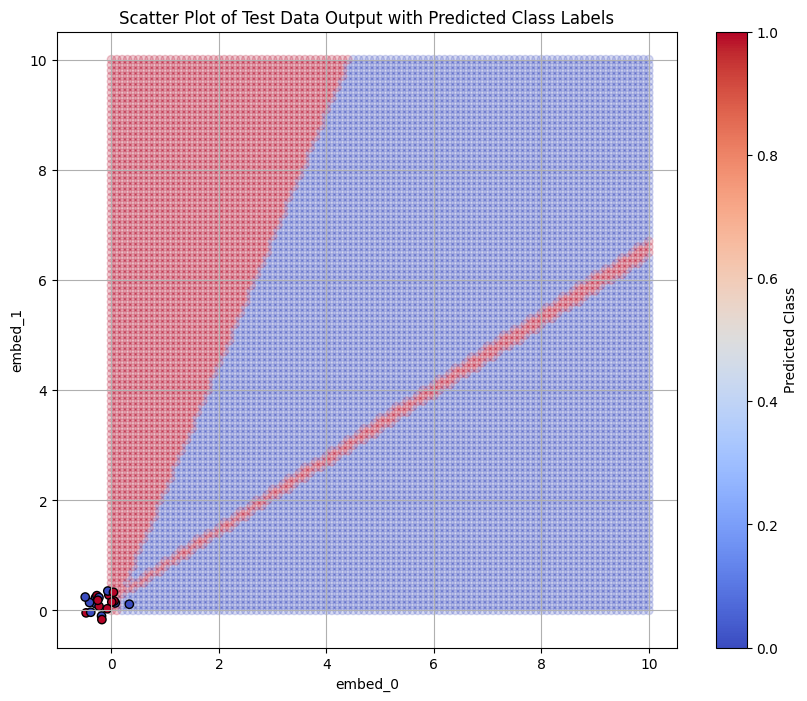

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Step 1: Load your project dataset
data = pd.read_excel("training_mathbert 1.xlsx")

# Step 2: Extract features and output classes
X_feature = 'embed_0'  # Replace 'feature1' with the name  first feature column
Y_feature = 'embed_1'  # Replace 'feature2' with the name  second feature column
output_class = 'output'  # Replace 'output' with the name  output class column

X = data[X_feature].values
Y = data[Y_feature].values
output = data[output_class].values

# Step 3: Generate 20 data points for training
# You can generate random data points or select specific points based on your dataset
# For demonstration purposes, let's randomly select 20 points
np.random.seed(0)  # for reproducibility
indices = np.random.choice(len(X), 20, replace=False)
X_train = X[indices]
Y_train = Y[indices]
output_train = output[indices]

# Step 4: Convert continuous output values into discrete class labels
# For example, you can use binning or encoding techniques
# Here, we'll consider values less than the median as class 0 and greater than or equal to the median as class 1
median_value = np.median(output_train)
output_train_discrete = np.where(output_train < median_value, 0, 1)

# Step 5: Train a kNN classifier with k = 3 on the training data
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(np.column_stack((X_train, Y_train)), output_train_discrete)

# Step 6: Generate test set data
x_test = np.arange(0, 10.1, 0.1)
y_test = np.arange(0, 10.1, 0.1)
xx, yy = np.meshgrid(x_test, y_test)
test_data = np.c_[xx.ravel(), yy.ravel()]

# Step 7: Classify the test points using the trained kNN classifier
predicted_labels = knn.predict(test_data)

# Step 8: Make a scatter plot of the test data output with predicted class labels
plt.figure(figsize=(10, 8))
plt.scatter(xx.ravel(), yy.ravel(), c=predicted_labels, cmap=plt.cm.coolwarm, alpha=0.2)
plt.scatter(X_train, Y_train, c=output_train_discrete, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title('Scatter Plot of Test Data Output with Predicted Class Labels')
plt.xlabel(X_feature)
plt.ylabel(Y_feature)
plt.colorbar(label='Predicted Class')
plt.grid(True)
plt.show()

# Step 9: Repeat steps 6-8 for various values of k to observe the change in the class boundary lines
# You can loop over different values of k and repeat steps 6-8 for each value of k

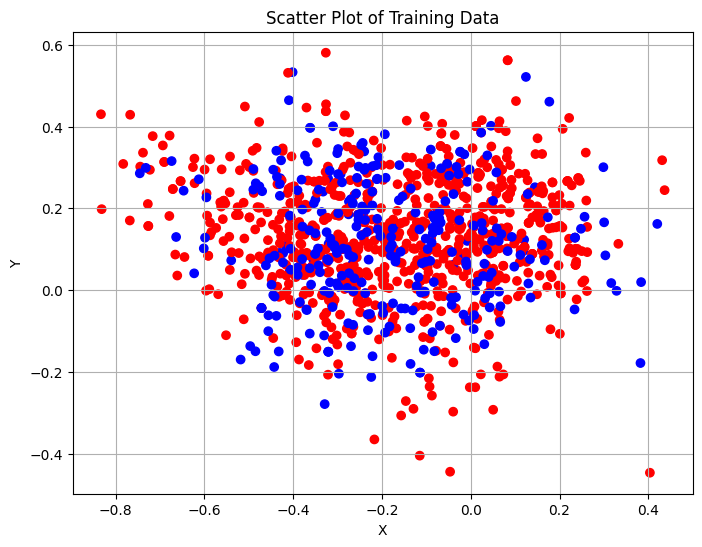

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel("training_mathbert 1.xlsx")  # Replace "your_dataset.csv" with the actual file path

# Extracting features X and Y from the dataset
X = data['embed_0'].values
Y = data['embed_1'].values

# Extract the output column
output = data['output'].values

# Assign points to two different classes (class0 - Blue & class1 - Red)
class_colors = ['blue' if (val < 1 or  val > 4 ) else 'red' for val in output]

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color=class_colors)

plt.title('Scatter Plot of Training Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

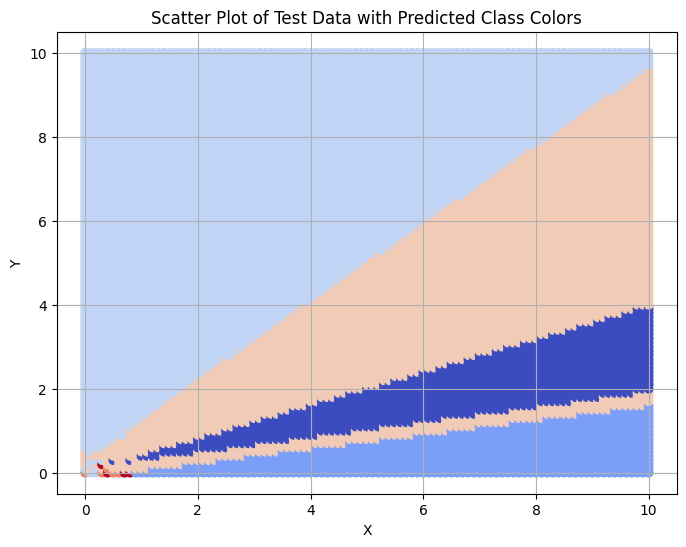

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset
data = pd.read_excel("training_mathbert 1.xlsx")  # Replace "your_dataset.csv" with the actual file path

# Extracting features X and Y from the dataset
X_train = data[['embed_0', 'embed_1']].values  # Assuming 'embed_0' and 'embed_1' are the features
y_train = data['output'].values

# Round the continuous output values to the nearest integer to convert them into discrete classes
y_train_discrete = np.round(y_train)

# Train the kNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train_discrete)

# Generate test data
x_test = np.arange(0, 10.1, 0.1)  # Generate X values from 0 to 10 with increment 0.1
y_test = np.arange(0, 10.1, 0.1)  # Generate Y values from 0 to 10 with increment 0.1
X_test = np.column_stack((np.repeat(x_test, len(y_test)), np.tile(y_test, len(x_test))))  # Combine X and Y values

# Predict the classes of test data points
y_pred_discrete = knn.predict(X_test)

# Plot the test data output with predicted class colors
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_discrete, cmap=plt.cm.coolwarm)
plt.title('Scatter Plot of Test Data with Predicted Class Colors')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
df = pd.read_excel("Lab Session1 Data.xlsx").iloc[:, :5]
print(df)
A = df.iloc[:, 1:4]
C = df.iloc[:, 4]
print(A)
print(C)
vector_dimension = A.shape[1]
print(vector_dimension)
vector_space = A.shape[0]
print(vector_space)
rank_A = np.linalg.matrix_rank(A)# rank
print(rank_A)
psuedo_inverse = np.linalg.pinv(A)# pseudoinverse
print(psuedo_inverse)
df['Category'] = np.where(df['Payment (Rs)'] > 200, 'RICH', 'POOR')

# Feature Engineering: Extract relevant features
# For example, you might use columns like 'Product_1', 'Product_2', 'Product_3', etc.
mean_payment=df['Payment (Rs)'].mean() # Mean of Payments column
# Select features and target variable
features = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)','Payment (Rs)']]  # Adjust based on your features
target = df['Payment (Rs)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=True)

# Choose a classifier (Random Forest as an example)
classifier = LogisticRegression()

# Train the model
classifier.fit(X_train, y_train)
# Make predictions
y_pred = classifier.predict(X_test)
n=C.shape[0]
print(X_test)
mean_sum=0
print(y_pred)
sum=0
mape=[]
for i,j in X_test['Payment (Rs)'],y_pred:
    sum+=(i-j)**2
    mean_sum+=(i-mean_payment)**2
    diff=abs((i-j)/i)*100
    mape.append(diff)
rmse=np.sqrt(sum/n)
r2score=1-(sum/mean_sum)
print("The mean square  error is", sum/n)
print('Root Mean Squared Error is : ', rmse)
print("The mape for each value in the test set : " ,mape)
print("R2score : ", r2score)

  Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs)
0      C_1           20             6                 2           386
1      C_2           16             3                 6           289
2      C_3           27             6                 2           393
3      C_4           19             1                 2           110
4      C_5           24             4                 2           280
5      C_6           22             1                 5           167
6      C_7           15             4                 2           271
7      C_8           18             4                 2           274
8      C_9           21             1                 4           148
9     C_10           16             2                 4           198
   Candies (#)  Mangoes (Kg)  Milk Packets (#)
0           20             6                 2
1           16             3                 6
2           27             6                 2
3           19             1              

c:\Users\V R N S Nikhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
